# NGC 6402 Analysis - optical data

In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
%matplotlib inline 

In [2]:
target = 'NGC6402'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '17:37:36.10'
cluster_dec = '-03:14:45.3'

# Variable stars

In [ ]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

# Period Search

### Read in variables from Clement catalog

In [3]:
dtype1 = np.dtype([('id', 'S10'), ('period', float)])
data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))

datasets, colors = optical.compile_datasets(folder, old=0, returnColors=True)



Datasets:

  1    ct07jun  31156 2007-06-22 2007-07-12 k
  2      Y0609  18072 2006-09-28 2006-10-03 r
  3      Y0608  16928 2006-08-10 2006-08-16 b
  4      Y0704  12283 2007-04-07 2007-04-11 g
  5    dan0509  12189 2005-09-18 2005-09-20 m
  6    ct07may   9310 2007-05-25 2007-05-30 c
  7       dahl   2900 2014-06-21 2014-08-10 xkcd:brown
  8      Y1110   1590 2011-10-05 2011-10-05 xkcd:coral
  9     sm0705   1555 2007-06-02 2007-06-02 xkcd:purple
 10       wfi5   1419 2002-06-21 2002-06-21 xkcd:maroon
 11        int   1285 1998-06-25 1998-06-25 xkcd:olive
 12      bond4   1240 1999-06-11 1999-06-11 xkcd:tan
 13    arcsat4   1095 2017-05-23 2017-05-27 xkcd:grey
 14   sm070906    951 2007-09-07 2007-09-07 xkcd:teal
 15      bond8    784 1996-09-23 1996-09-23 xkcd:tomato
 16      bond7    782 2001-03-26 2001-03-26 xkcd:orchid
 17  susi03may    601 2003-05-31 2003-05-31 xkcd:goldenrod
 18    jkt9905    408 1999-05-13 1999-05-13 xkcd:orange
 19     ct1206    318 2012-06-10 2012-06-10 xk

In [4]:
# Find periods for all stars in clement catalog

print '\n\nStar  Period_old  Period_new'

for ind, lcv in enumerate(data['id']):

# Open file to save periods
    if ind == 0:
        f_handle = open(folder+'periods.txt', 'w')
    else:
        f_handle = open(folder+'periods.txt', 'a')

    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    clement_period = data['period'][data['id'] == lcv]
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file)
        new_guess, guess_snr = lightcurves.period_search_LS(V, lcv, plot_save=1, data_dir=folder)
        period_diff = np.abs(new_guess - clement_period)
        if period_diff < 0.01 and np.isnan(clement_period) == 0:
            new_period = lightcurves.period_search(V, new_guess, second_band=B, search_window=0.00005)
            lightcurves.plot_phased_optical_lcv(U, B, V, R, I, new_period, lcv, datasets, plot_save=1,data_dir=folder, colors=colors)

        else:
            new_period = lightcurves.period_search(V, new_guess, second_band=B, search_window=0.00005)
            second_period = lightcurves.period_search(V, clement_period, second_band=B, search_window=0.0001) 
            lightcurves.plot_phased_optical_lcv(U, B, V, R, I, new_period, lcv, datasets, plot_save=1,data_dir=folder, colors=colors)
            lightcurves.plot_phased_optical_lcv(U, B, V, R, I, second_period, lcv+'c', datasets, plot_save=1,data_dir=folder, colors=colors)

        print '%10s %0.4f %0.8f %0.2f' % (lcv, clement_period, new_period, guess_snr)
        f_handle.write('%10s %0.4f %0.8f\n' % (lcv, clement_period, new_period))

    except IOError:
        new_period = np.nan
        print '%10s %0.4f %0.8f %7s' % (lcv, clement_period, new_period, 'No data')
        f_handle.write('%10s %0.4f %0.8f %10s\n' % (lcv, clement_period, new_period, '# no data'))        

    except:
        new_period = np.nan
        print '%10s %0.4f %0.8f' % (lcv, clement_period, new_period)
        f_handle.write('%10s %0.4f %0.8f\n' % (lcv, clement_period, new_period))

    # Close the periods file
    f_handle.close()



Star  Period_old  Period_new
        V3 0.5223 0.52241590 15.13
        V4 0.6514 0.65132320 26.83
        V5 0.5488 0.54879090 14.28
        V8 0.6860 0.68606820 14.27
        V9 0.5387 0.53881310 24.82
       V10 0.5860 0.58592570 12.15
       V11 0.6044 0.60443510 19.40
       V12 0.5045 0.50396750 28.40
       V13 0.5340 0.53521990 16.18
       V14 0.4722 0.47201510 14.73
       V15 0.5578 0.55772920 17.41
       V16 0.6005 0.60062200 24.41
       V18 0.4790 0.47903370 14.65
       V19 0.5460 0.54568030 16.73
       V20 0.2635 0.26352990 35.28
       V21 0.3188 0.31887490 31.35
       V22 0.6564 0.65591380 18.09
       V23 0.5523 0.55232880 19.68
       V24 0.5199 0.51989620 18.84
       V25 0.3607 0.36070930 25.28
       V30 0.5345 0.53422230 20.44
       V31 0.6196 0.61963580 11.49
       V32 0.6559 0.65597380 18.58
       V33 0.4805 0.47996270 24.56
       V34 0.6066 0.60662020 22.35
       V36 0.6787 nan No data
       V37 0.4897 0.48903910 38.23
       V38 0.5084 0.50772310 

V131 0.2697


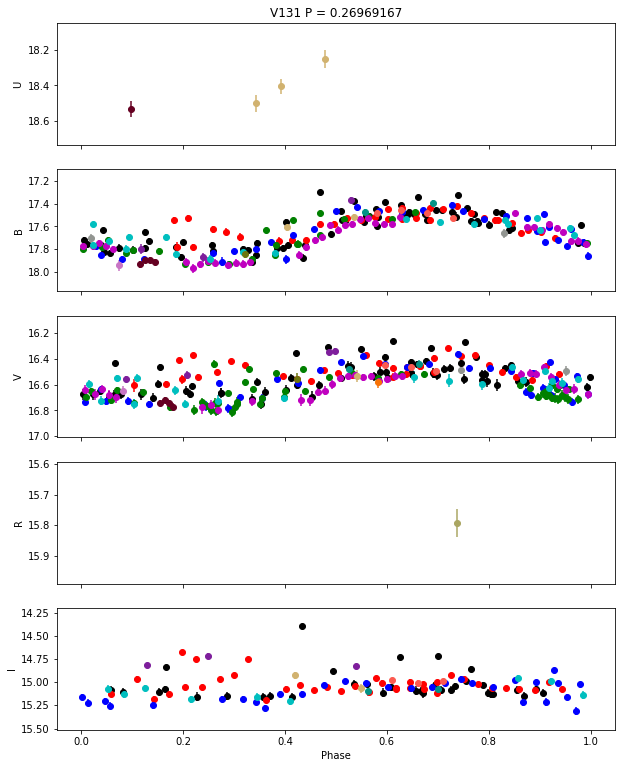

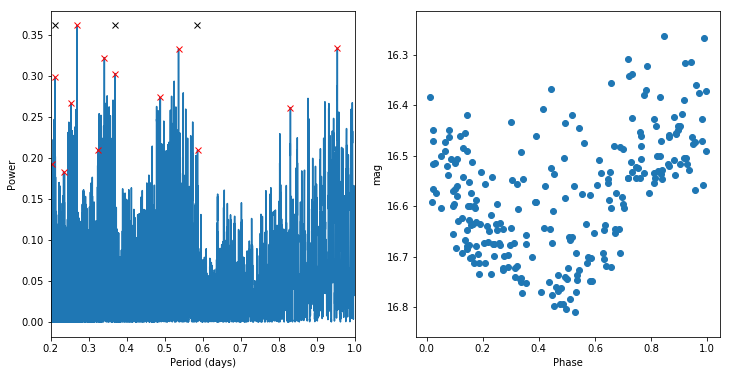

(0.2696886749556725, 10.505242310292687)


In [12]:
### For single star
ind=87
print data['id'][ind], data['period'][ind]
lcv = data['id'][ind]
initial_period = data['period'][ind]
lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'

U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
#lightcurves.plot_phased_optical_lcv(U, B, V, R, I, initial_period, lcv, datasets, error_threshold=0.05, colors=colors)
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, 0.26969167, lcv, datasets, error_threshold=0.05, colors=colors)#, plot_save=1, data_dir=folder)
# broad Lomb Scargle
new_guess = lightcurves.period_search_LS(V, lcv)
print new_guess

Star  Period  Period_new
V115 0.3359 0.25184107043


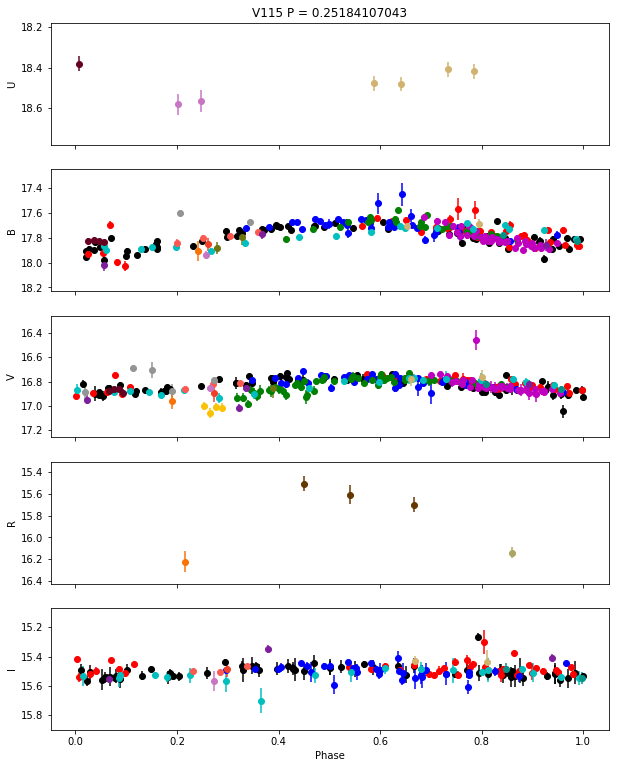

In [47]:
period = lightcurves.period_search(V, new_guess, lcv, second_band=B, search_window=0.00005)
print 'Star  Period  Period_new'
print lcv, initial_period, period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, error_threshold=0.1, colors=colors)


In [48]:
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, error_threshold=0.1, colors=colors, plot_save=1, data_dir=folder)



# Search for other variable candidates

In [14]:
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
catalog_data, dist = optical.read_fnl_w_radial_dist(optical_dir, target, center_ra, center_dec)

#dtype1 = np.dtype([('id', 'S8'), ('period', float), ('var_type', 'S5')])
dtype1 = np.dtype([('id', 'S8'), ('ra', 'S13'), ('dec', 'S13')])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,9,10))

Reading optical catalog for NGC3201...
Finished reading optical catalog.


Datasets:

     Y0701  95202 2007-01-13 2007-01-23 k
    lcogt2  69985 2013-03-14 2013-03-23 r
     Y0704  24334 2007-03-31 2007-04-13 b
    zingle  15701 1996-04-16 1996-04-19 g
      lee4  11616 2012-02-18 2012-02-23 m
     west1  11444 2005-02-11 2005-02-13 c
     wfi13  10623 2003-06-04 2003-06-06 xkcd:brown
    lcogt3   9918 2014-03-02 2014-03-02 xkcd:coral
    ct1204   8009 2012-04-24 2012-04-24 xkcd:purple
  efosc08a   7693 2008-04-19 2008-04-19 xkcd:maroon
     bond6   7436 1998-04-17 1998-04-22 xkcd:olive
      wfi6   6815 2002-02-20 2002-02-20 xkcd:tan
     B1201   6727 2012-01-06 2012-01-11 xkcd:grey
     wfi22   5403 2000-02-27 2000-02-27 xkcd:teal
efosc1101b   5379 2011-01-21 2011-01-21 xkcd:tomato
      lee2   5052 2011-05-30 2011-06-03 xkcd:orchid
     wfi41   4855 2012-02-24 2012-02-27 xkcd:goldenrod
     wfi11   4648 1999-12-05 1999-12-05 xkcd:orange
     west2   4238 2005-05-05 2005-05-05 xkcd:

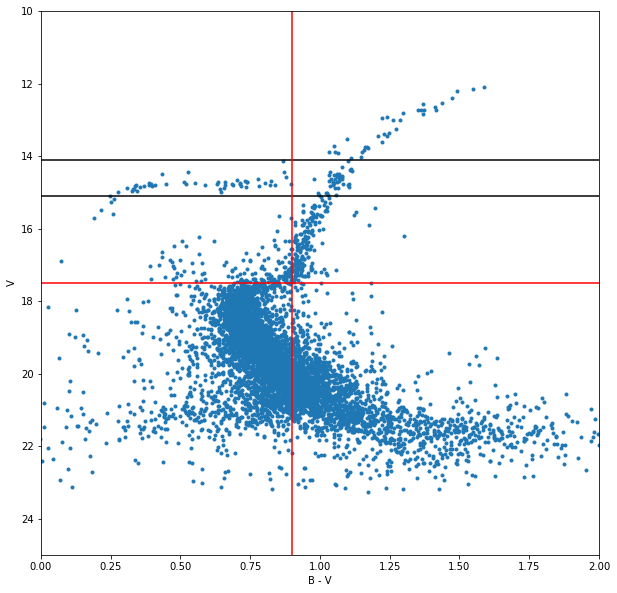

In [18]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')
# Define HB
HB_lower = 15.1
HB_upper = 14.1
mp.axhline(HB_lower, color='k')
mp.axhline(HB_upper, color='k')
#Define GB
GB_red = 0.9
GB_lower = 17.5
mp.axvline(GB_red, color='r')
mp.axhline(GB_lower, color='r')

88 candidate RRL stars.
123 candidate variables on GB.
386 other candidate variables.


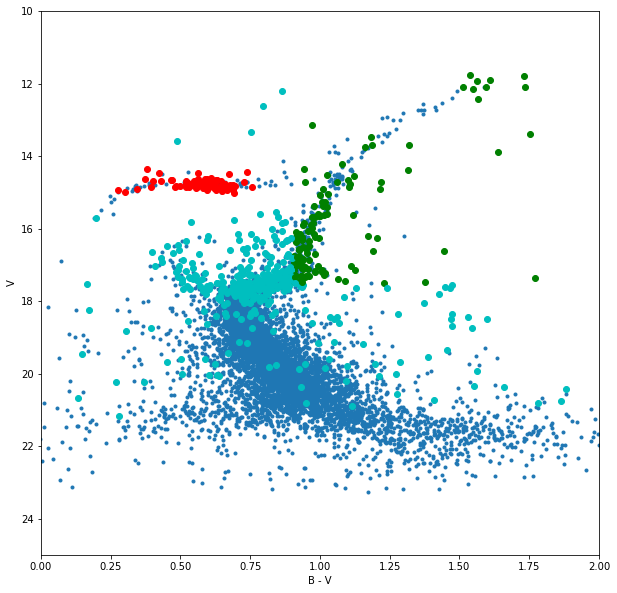

In [19]:
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= HB_lower and mag_var >= HB_upper and color_var <= GB_red):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= GB_lower and color_var >= GB_red):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

RRL_candidates = data['id'][type_var == 'RRL']
print str(len(RRL_candidates))+' candidate RRL stars.'
GB_variables = data['id'][type_var == 'GB']
print str(len(GB_variables))+' candidate variables on GB.'
other_variables = data['id'][type_var == 'OTH']
print str(len(other_variables))+' other candidate variables.'

In [ ]:
for ind, star in enumerate(other_variables):
    print ind, star, data['ra'][data['id'] == star], data['dec'][data['id'] == star]

In [ ]:
ind = 24
lcv_name = other_variables[ind]
#lcv_name = RRL_candidates[ind]
#lcv_name = 'V60'
lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
#print lcv_name, data['var_type'][ind], data['period'][ind]
#cc_period = data['period'][ind]
print lcv_name

In [ ]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')


color_var = np.mean(B[0]) - np.mean(V[0])
mag_var = np.mean(V[0])
mp.plot(color_var, mag_var, 'ro')
mp.show()

# remove data with large error bars
error_threshold = 0.1
V[0][V[1] > error_threshold] = np.nan
V[1][V[1] > error_threshold] = np.nan

lightcurves.plot_raw_optical_lcv(V)

# Find best dataset to use
sources_prefix = np.zeros(len(V[3]), dtype='S30')
for ind, string in enumerate(V[3]):
    sources_prefix[ind] = string.split(':')[0]
sources, counts = np.unique(sources_prefix, return_counts=True)
best_source = sources[counts == np.max(counts)]

num_obs_in_run = len(V[0][sources_prefix == best_source])
longest_dataset = np.zeros((4, num_obs_in_run), dtype=object)
longest_dataset[0][:] = V[0][sources_prefix == best_source]
longest_dataset[1][:] = V[1][sources_prefix == best_source]
longest_dataset[2][:] = V[2][sources_prefix == best_source]
longest_dataset[3][:] = V[3][sources_prefix == best_source]

lightcurves.plot_raw_optical_lcv(longest_dataset)


# find night with the most data

obs_times = np.array(longest_dataset[2], dtype=float)
nights = np.round(obs_times, 0)
uniq_nights, counts = np.unique(nights, return_counts=True)
order = np.argsort(counts)
best_nights = uniq_nights[order]
best_night = uniq_nights[counts == np.max(counts)][0]
num_obs_in_night = len(V[2][nights == best_night])

longest_night = np.zeros((4, num_obs_in_night), dtype=object)
longest_night[0][:] = longest_dataset[0][nights == best_night]
longest_night[1][:] = longest_dataset[1][nights == best_night]
longest_night[2][:] = longest_dataset[2][nights == best_night]
longest_night[3][:] = longest_dataset[3][nights == best_night]


lightcurves.plot_raw_optical_lcv(longest_night)

In [ ]:
candidate_periods = variables.candidate_variables(V, lcv_name, min_period=0.1, max_period=0.9, grid_num=1000)



In [ ]:
for period in candidate_periods:
    if period == 0:
        continue
    lightcurves.plot_phased_optical_one_band(V, period, lcv_name, datasets)